# Softmax Regression

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: $ y_i \in {0, 1}$. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle $y_i \in {1, \dots,K}$ where $K$ is the number of classes.

Recall that in logistic regression, we had a training set $(x_1, y_1), \dots, (x_m, y_m)$ of m labeled examples, where the input features are $x_i  \in R^n$. With logistic regression, we were in the binary classification setting, so the labels were $y_i \in {0, 1}$. Our hypothesis took the form:

$$
h_{\theta}(x) = \frac{1}{1 + \exp{−\theta^TX}}
$$

and the model parameters $\theta$ were trained to minimize the cost function

$$
J(\theta) = −\left[\sum_{i = 1}^{M} y_i \log h_{\theta}(x_i) + (1 − y_i) \log(1 − h_{\theta}(x_i))\right]
$$

In the softmax regression setting, we are interested in multi-class classification (as opposed to only binary classification), and so the label $y$ can take on $K$ different values, rather than only two. Thus, in our training set $(x_1, y_1), \dots, (x_m, y_m)$, we now have that $y_i \in {1, 2, \dots, K}$. For example, in the MNIST digit recognition task, we would have K=10 different classes.

In [1]:
%matplotlib inline

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from utils import load_cached_mnist
from ufldl.linear_model import LogisticRegression
from ufldl.datasets import load_mnist

Due to the size of the MNIST dataset we decided to leave this source of data outside of the `ufldl` package, and download it separately. We built however a few helper functions to load and preprocess the dataset, since this will be reused later on in other exercises.

In [4]:
# load training dataset
X_train, y_train = load_cached_mnist(type_='train')

# train softmax regression classifier
model = LogisticRegression(fit_intercept=True, multi_class='multinomial')
model.fit(X=X_train, y=y_train)

# compute accuracy on training set
predicted_train_digit = model.predict(X=X_train)
correct = np.sum(y_train == predicted_train_digit)
train_accuracy = correct / len(y_train)
print('Train accuracy: {0:.2f}%'.format(train_accuracy * 100))
print('Misclassified observations: {} / {}'.format(len(y_train) - correct, len(y_train)))

/home/gianluca/git/ufldl-tutorial/src/ufldl/linear_model/logistic.py:144: RuntimeWarning: overflow encountered in exp
  values = np.exp(np.dot(X, theta))
/home/gianluca/git/ufldl-tutorial/src/ufldl/linear_model/logistic.py:146: RuntimeWarning: invalid value encountered in true_divide
  return (values.T / sums).T
/home/gianluca/git/ufldl-tutorial/src/ufldl/linear_model/logistic.py:135: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(self.probs(theta, X))


Train accuracy: 73.67%
Misclassified observations: 15801 / 60000


[]

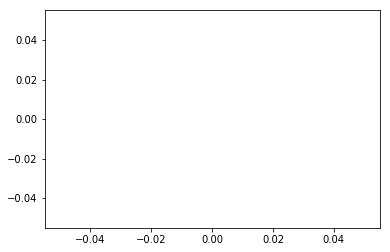

In [3]:
plt.plot(x=[i for i in range(len(model.j_history))], y=model.j_history)

In [5]:
from sklearn.linear_model import LogisticRegression as LogReg

model = LogReg(fit_intercept=True, multi_class='multinomial', solver='sag')
model.fit(X=X_train, y=y_train)

# compute accuracy on training set
predicted_train_digit = model.predict(X=X_train)
correct = np.sum(y_train == predicted_train_digit)
train_accuracy = correct / len(y_train)
print('Train accuracy: {0:.2f}%'.format(train_accuracy * 100))
print('Misclassified observations: {} / {}'.format(len(y_train) - correct, len(y_train)))

Train accuracy: 93.96%
Misclassified observations: 3622 / 60000


/home/gianluca/.virtualenvs/ufldl/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We are able to achieve a perfect accuracy in the training set. This is remarkable, although results are inflated by the fact that the data has already been seen. Let's see how the algorithm performs in unseen data. We should expect performance to be a little worse, but hopefully not that much.

In [13]:
# compute accuracy on test set
X_test, y_test = load_cached_mnist(type_='test')
predicted_test_prices = model.predict(X=X_test)
correct = np.sum(y_test == predicted_test_prices)
test_accuracy = correct / len(y_test)
print('Test accuracy: {0:.2f}%'.format(test_accuracy * 100))
print('Misclassified observations: {} / {}'.format(len(y_test) - correct, len(y_test)))

Test accuracy: 99.86%
Misclassified observations: 3 / 2115


/home/gianluca/git/ufldl-tutorial/src/ufldl/linear_model/logistic.py:62: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


On the test set, performance are not that bad either. We are able to score an almost perfect accuracy, with only 3 observations out of more than 2,000 samples.